
# 📊 Data Analyst Portfolio Project

Welcome to my Data Analyst Portfolio!  
This notebook demonstrates my skills in **data cleaning, analysis, and visualization** using Python.  
It includes exploratory data analysis (EDA) and insights extracted from the dataset.

---


## 📌 Introduction <a id="introduction"></a>

The goal of this project is to analyze the dataset, uncover patterns, and present meaningful insights.  
This analysis highlights practical data analyst skills such as:
- Data cleaning & preprocessing
- Exploratory Data Analysis (EDA)
- Visualization & storytelling


# Investigating Netflix Movies Project

1. What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration
2. A movie is considered short if it is less than 90 minutes. Count the number of short action movies relesaed 1990s and save this integer as short_movie_count


### Importing relevant libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading in the csv vile

In [4]:
df = pd.read_csv("netflix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


### Having an overview of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


The dataframe has 11 columns, there are no null values and the target colums are in the right data format

### Checking for duplicate values/entries

In [13]:
df.duplicated().sum()

np.int64(0)

# Subsetting the data

### Subsetting the dataframe to isolate movies released in the 1990s

In [19]:
subset = df["release_year"].between(1990,1999)
df = df[subset]
df["release_year"].value_counts()

release_year
1997    26
1998    26
1999    26
1993    16
1995    16
1992    16
1990    15
1996    15
1994    14
1991    14
Name: count, dtype: int64

### Creating an histogram to visualize the count of movies released in the 1990s

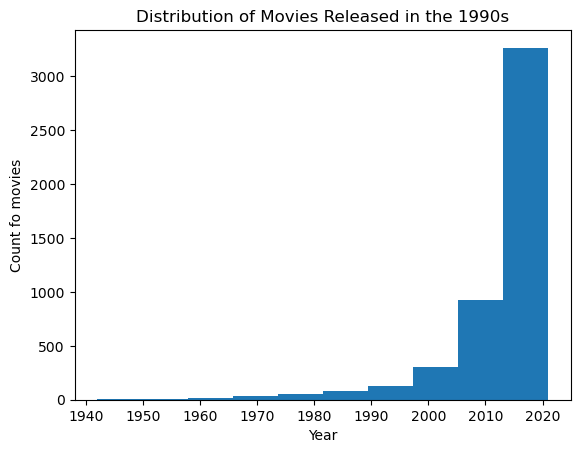

In [11]:
plt.hist(df["release_year"])
plt.xlabel("Year")
plt.ylabel("Count fo movies")
plt.title("Distribution of Movies Released in the 1990s")
plt.show();

Netflix featured a higher propotion of movies premiered in the late 1990s than those released in the early amd mid 1990s

# Question 1

What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration

In [22]:
df["duration"].value_counts()

duration
94     7
101    6
95     5
108    5
93     5
      ..
83     1
138    1
141    1
30     1
191    1
Name: count, Length: 92, dtype: int64

### Using the "mode" in built statistics function to deduce the most frequent movies

In [24]:
duration = df["duration"].mode().sum()
duration

np.int64(94)

The most frequent movie duration in the 1990s is 94 minutes

### Confirming the datatype of the variable name "duration"

In [25]:
duration.dtype

dtype('int64')

# Question 2:
A movie is considered short if it is less than 90 minutes. Count the number of short action movies relesaed 1990s and save this integer as short_movie_count

### Checking out the different genres of movies released in the 1990s

In [7]:
df["genre"].value_counts()

genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
International TV          39
Crime TV                  30
Uncategorized             25
British TV                20
Independent Movies        20
Anime Features            18
Music                     14
Cult Movies               11
Sci-Fi                    11
Kids                      10
Anime Series               9
Docuseries                 7
TV Shows                   4
Romantic Movies            3
TV Comedies                3
TV Action                  2
Romantic TV                1
TV Horror                  1
Classic                    1
Reality TV                 1
LGBTQ Movies               1
Name: count, dtype: int64

### Creating a bar plot to visualize the genres of movies released in the 1990s

''

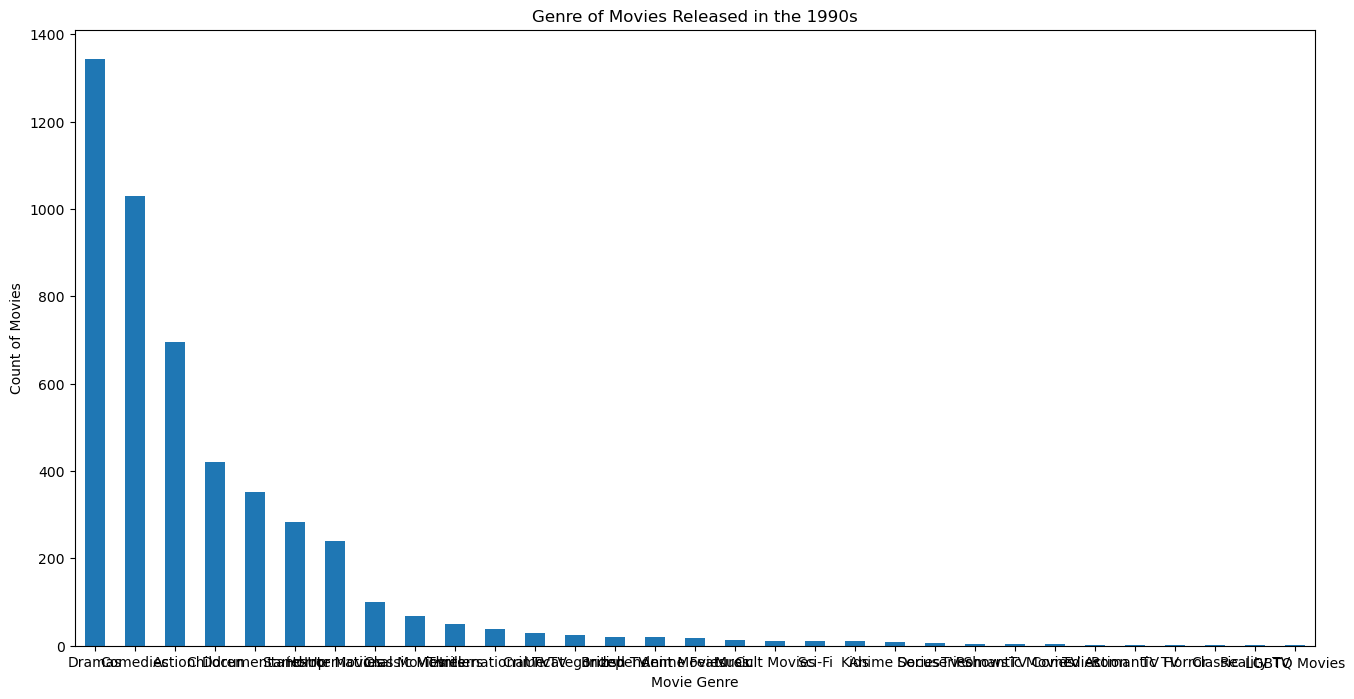

In [8]:
df["genre"].value_counts().plot(kind="bar", figsize = (16,8), rot=0);
plt.xlabel("Movie Genre")
plt.ylabel("Count of Movies")
plt.title("Genre of Movies Released in the 1990s")


;

### Subsetting the short action movies with duration less than 90 minuites

In [41]:
short_action_movies = (df["genre"] == "Action") & (df["duration"] < 90)
short_action_movies

6       False
118     False
145     False
167     False
194     False
        ...  
4672    False
4689    False
4718    False
4746    False
4756    False
Length: 184, dtype: bool

### Obtaining the total count of movies with short duration

In [44]:
short_movie_count = short_action_movies.sum()
short_movie_count

np.int64(7)

## On Netflix, there are only 7 action movies that were premiered in the 1990s